In [1]:
autosave 0

Autosave disabled


# Titanic Machine Learning kihívás

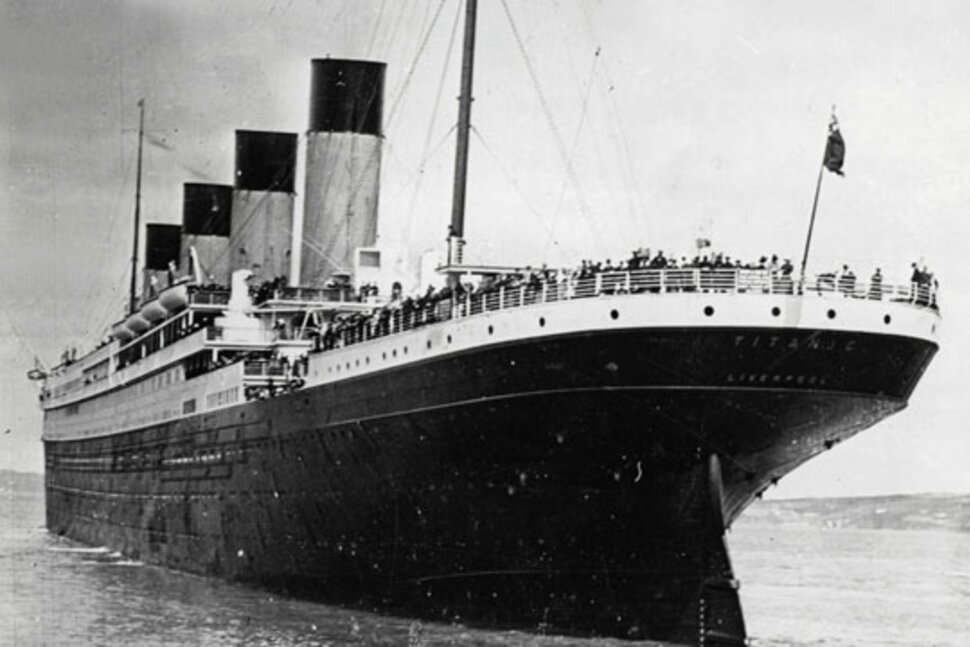


## Bevezetés

Ez a legendás Titanic ML challenge – az egyik legjobb kezdő szintű kihívás, hogy belemerüljünk a Machine Learning világába.

Link: https://www.kaggle.com/c/titanic


## A kihívás

A Titanic elsüllyedése a történelem egyik legismertebb hajótörése. 1912. április 15-én, első útja során a széles körben elsüllyeszthetetlennek tartott RMS Titanic jéghegynek ütközve elsüllyedt. Sajnos nem volt elég mentőcsónak mindenki számára a fedélzeten, így a 2224 utasból és a legénységből 1502-en meghaltak. Noha a túlélésben szerepet játszott a szerencse is, úgy tűnik, hogy egyes 'csoportok' nagyobb valószínűséggel maradtak életben, mint mások.

Válaszoljuk meg a következő kérdést az ismert utasadatok felhasználásával: az utasok mely csoportjai maradtak nagyobb valószínűséggel életben? 


## Adatok

Ebben a kihívásban két hasonló adatkészletet használok, amelyek az utasokra vonatkozó információkat, például nevet, életkort, nemet, társadalmi-gazdasági osztályt tartalmaznak. Az egyik adatkészlet a train.csv, a másik pedig a test.csv.

A 'train.csv' tartalmazza a fedélzeten tartózkodó utasok egy részhalmazának részleteit (891 utas), és ami fontos, tartalmazza, hogy életben maradtak-e vagy sem. (elhunyt=549, túlélő=342).<br>Ez lesz a betanítási adatkészlet.

A 'test.csv' adatkészlet (418 utas) hasonló információkat tartalmaz, de nem fedi fel az egyes utasok túlélték-e a katasztrófát. A feladatom, hogy megválaszoljam ezt.


## Cél

Ebben a kihívásban felépítek egy prediktív modellt amely előrejelzi, hogy az egyes utasok túlélték-e vagy sem a hajó katasztrófáját. A célformátum egy csv fájl ami két mezőt tartalmaz: az utas ID és egy bináris érték, hogy az utas túlélte-e a katasztrófát. (1=túlélő, 0=elhunyt)


<br><br>

# KÓD

## Szükséges library-k importálása

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

## Adatok betöltése

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
warnings.filterwarnings('ignore')
# label = LabelEncoder()

## Mely tulajdonságok (oszlopok) szerepelnek az adatkészletben?

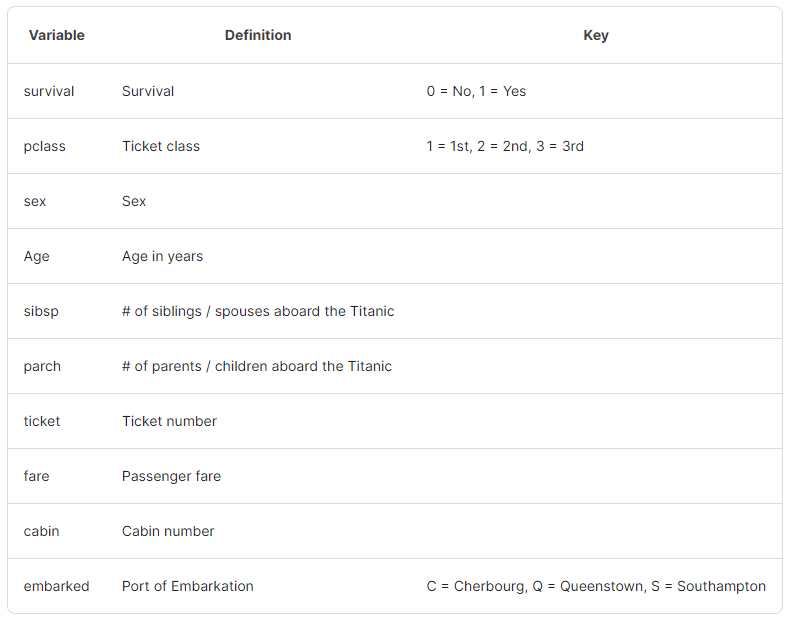


Kategorikus: 'Survived', 'Sex', 'Embarked', 'Pclass'<br>Numerikus folyamatos: 'Age', 'Fare'<br>Numerikus diszkrét: 'SibSp', 'Parch'<br>Vegyes: a 'Ticket' numerikus és alfanumerikus adattípusok keveréke, a 'Cabin' alfanumerikus

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Mely tulajdonságok tartalmaznak üres, null vagy hiányzó értékeket?
(ezeket javítani kell)<br>

Training dataset esetében: Age, Cabin és Embarked oszlopban található 'nulla' érték<br>Test dataset: Age, Fare, Cabin

In [6]:
train.info()
print('\n\n')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclas

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Milyen a kategorikus tulajdonságok eloszlása?

A nevek 'Name' egyediek az adathalmazon belül (szám=egyedi=891). <br> A nemre vonatkozó változó 'Sex' két lehetséges értékkel rendelkezik, a férfi 65%-kal (top=férfi, gyakoriság=577/szám=891). <br> A 'Cabin' értékek többször ismétlődnek az egyes minták között. Más szóval több utas osztozott egy kabinon. <br> Az 'Embarked' három lehetséges értéket vehet fel. A legtöbb utas által használt az 'S' kikötő (top=S).<br>  A 'Ticket' tulajdonság magas arányú (22%) ismétlődő értékeket tartalmaz (egyedi=681).

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Megállapítások az adatelemzés alapján
--- Korreláció ---<br>
Szeretném tudni, mennyire korrelálnak az egyes tulajdonságok a túlélési eséllyel. 

--- Kitöltés ---<br>
Lehet, hogy érdemes lenne kitölteni az Age oszlop hiányzó értékeit, mivel egyértelműen kapcsolódik a túléléshez.<br>
Kitöltés lehet szükséges az Embarked tulajdonságnál is, mivel ez is kapcsolódhat a túléléshez vagy más fontos tulajdonsághoz.

--- Javítás ---<br>
A Ticket oszlop elhagyható az elemzésből, mivel magas ismétlődési arányú (22%), és nincs kapcsolat a Ticket és a túlélés között.<br>
A Cabin oszlopot elhagyhatjuk, mivel rendkívül hiányos vagy sok null értéket tartalmaz mind a training(train), mind a teszt adathalmazban.<br>
A PassengerId elhagyható a training adathalmazból, mivel nem járul hozzá a túléléshez.<br>
A Name tulajdonság minden értéke különböző és közvetlenül nem járul hozzá a túléléshez, így elhagyható.

--- Új oszlop(ok) létrehozása ---<br>
A Name oszlopból kinyerhetjük a 'Title'-t mint új tulajdonságot.<br>

--- További feltételezések ---<br>
A nők (Sex=female) valószínűbb, hogy túlélték.<br>
A gyerekek (Age<?) valószínűbb, hogy túlélték.<br>
A felsőosztályú utasok ('Pclass'=1) valószínűbb, hogy túlélték.

## Elemzés Pivot táblák létrehozásával

A feltételezéseink megerősítéséhez gyorsan elemezhetjük a tulajdonságok közötti korrelációkat Pivot táblák segítségével. Ezt csak azokra a oszlopokra tehetjük meg ebben a szakaszban, amelyeknek nincsenek üres értékeik, és csak azokra a oszlopokra érdemes ezt megtenni, amelyek kategorikusak (Sex, Pclass) vagy diszkrétek (SibSp, Parch)

Pclass: megfigyeljük a jelentős korrelációt (>0.5) a Pclass=1 és a Survived között.<br>
Sex: az összes nő 74%-a, az összes férfi 18%-a élte túl a katasztrófát.<br>

In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<br>

## Adatvizualizáció (train dataset)

<br><br>

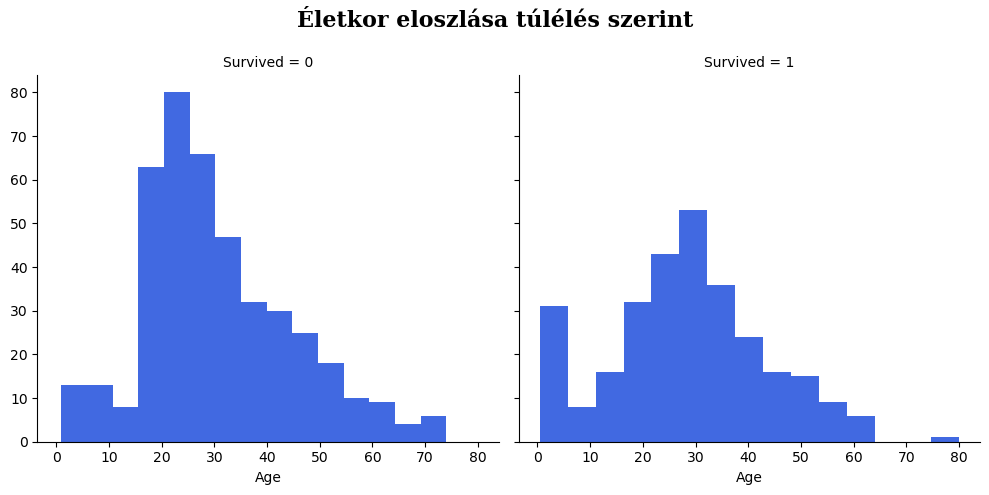

In [13]:
g = sns.FacetGrid(train, col='Survived', height=5)
g.map(plt.hist, 'Age', bins=15, color='royalblue')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Életkor eloszlása túlélés szerint', fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

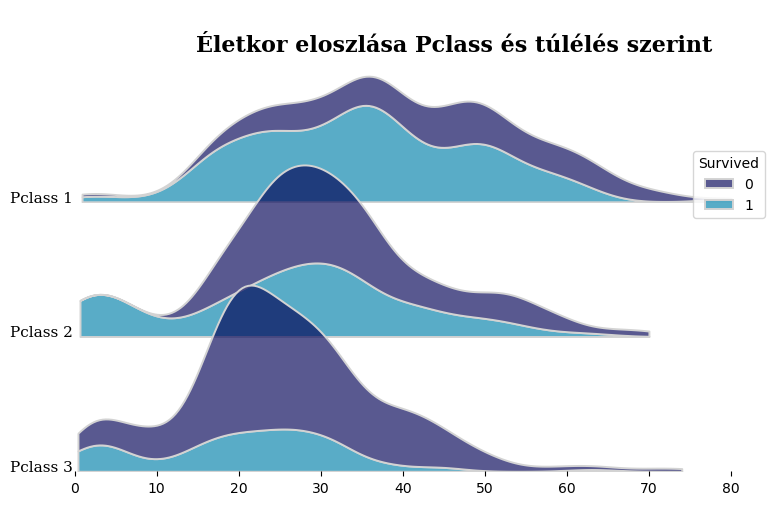

In [14]:
fig = plt.figure(figsize=(9, 6))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.30)

axes = list()

for idx, cls in zip(range(3), sorted(train['Pclass'].unique())):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    sns.kdeplot(x='Age', data=train[train['Pclass']==cls], fill=True, ax=axes[idx], cut=0, bw_method=0.25, lw=1.4,     
    edgecolor='lightgray', hue='Survived', multiple="stack", alpha=0.65, palette="ocean") 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.26, 0.81, "Életkor eloszlása Pclass és túlélés szerint", fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()    

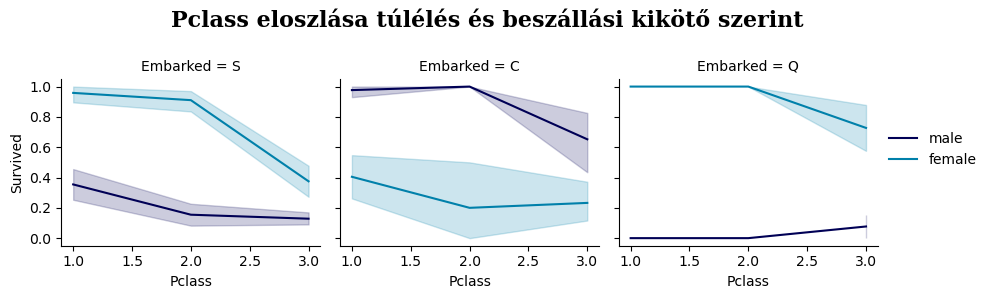

In [15]:
g = sns.FacetGrid(train, col='Embarked')
g.map(sns.lineplot, 'Pclass', 'Survived', 'Sex', palette='ocean')
g.fig.subplots_adjust(top=0.75)
g.fig.suptitle('Pclass eloszlása túlélés és beszállási kikötő szerint', fontweight="bold", fontfamily='serif', fontsize=16)
g.add_legend()
plt.show()

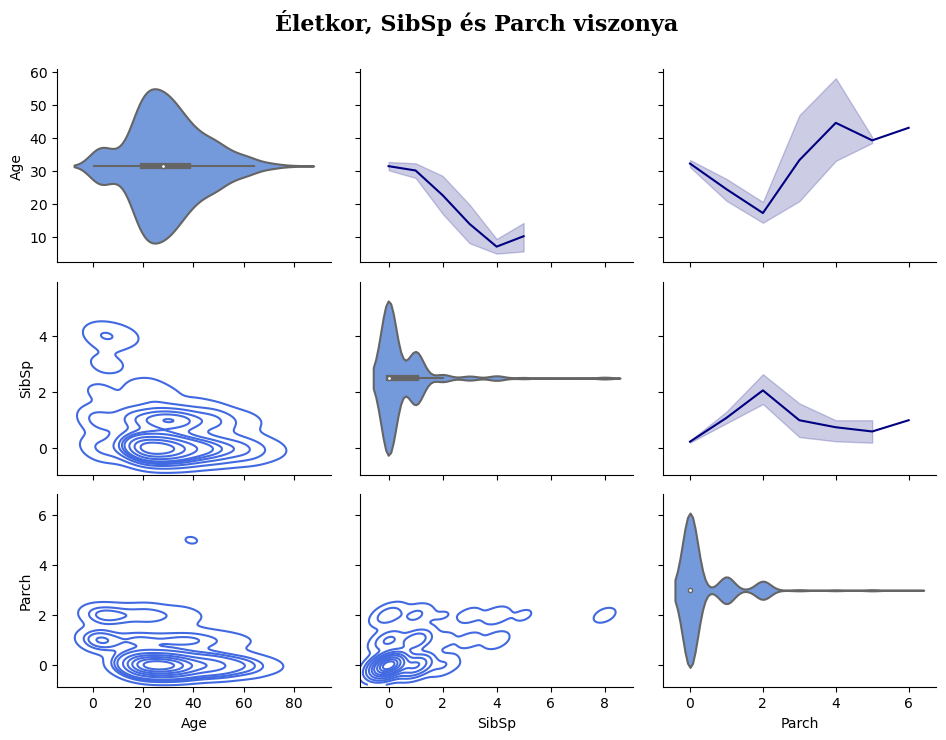

In [16]:
mask=train[['Age', 'SibSp', 'Parch']].reset_index().drop(['index'], axis=1)
g = sns.PairGrid(mask, aspect=1.3)
g.map_diag(sns.violinplot, color='cornflowerblue')
g.map_upper(sns.lineplot, color='navy')
g.map_lower(sns.kdeplot, color='royalblue')
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Életkor, SibSp és Parch viszonya', fontweight="bold", fontfamily='serif', fontsize=16)
plt.show()

<br>

## Adat transzformációk

Itt egy kis segítség, innen kaptam én is néhány ötletet: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

<br>

'Ticket' és 'Cabin' oszolopok eldobása (törlése)

In [17]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

'Title' kinyerése a 'Name' oszlopból

Szeretném elemezni, hogy a Név tulajdonságot lehet-e módosítani, hogy kinyerjem a titulusokat. Majd megnézem a titulusok és a túlélés közötti korrelációt, mielőtt elhagynám a Név és a PassengerId oszlopokat.

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Több címet kicserélek egy gyakoribbal, vagy ritkának 'Rare' minősítem azokat.

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


A Titulus oszlopot végül numerikussá alakítom.

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Most már törölhetem a 'Name' és a 'PassengerID' oszlopokat.

In [22]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]

A 'Sex' oszlopot szintén numerikussá alakítom. A legtöbb ML algoritmus megköveteli a numerikus értékeket.

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


'Age' oszlop hiányzó értékeinek kitöltése az Age mediánjával

In [24]:
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
combine = [train, test]

Az 'Embarked' oszlop a beszállási kikötőt mutatja: S=Southampton (Angila), C=Cherbourg (Franciaország), Q=Queenstown (Írország, mai nevén: An Cóbh) <br>
A training adatkészletben mindössze 2 rekordban hiányzik itt érték, ezért ebben az esetben szimplán a leggyakoribb értékkel töltöm fel. (S)

In [25]:
port = train.Embarked.dropna().mode()[0]
port

'S'

In [26]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Az 'Embarked' oszlopot numerikus értékekké alakítom.

In [27]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


A 'Fare' oszlop hiányzó értékét a 'Fare' értékeinek mediánjával töltöm fel.

In [28]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,3


Létrehozok egy 'FareBand' segédoszlopot, 4 értékkel.

In [29]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


A 'Fare' oszolop értékeit a 'FareBand' ordinális értékeivel helyettesítem, törlöm a 'FareBand' oszlopot.

In [30]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]

<br>

## Adatvizualizáció (train dataset az átalakítások után)
(nem összetévesztendő a fentebb szereplő Pivot-tábla értékekkel, a lentebb található 4 pie chart csak a túlélőkre koncentrál)

<br>

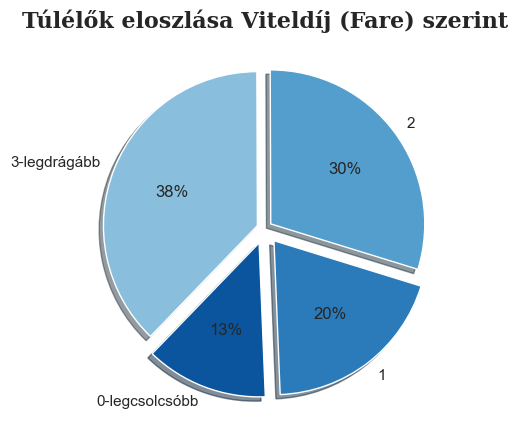

In [31]:
piedata1 = train.groupby('Fare')[['Survived']].sum()
sns.set (rc = {'figure.figsize':(5, 5)}, palette="Blues_r")
plt.title('Túlélők eloszlása Viteldíj (Fare) szerint', fontweight="bold", fontfamily='serif', fontsize=16)
plt.pie(x=piedata1['Survived'], labels=['0-legcsolcsóbb', '1', '2', '3-legdrágább'], autopct='%1.f%%', explode=(.1,.1,.05,.05), shadow=True, startangle=226)
plt.show()

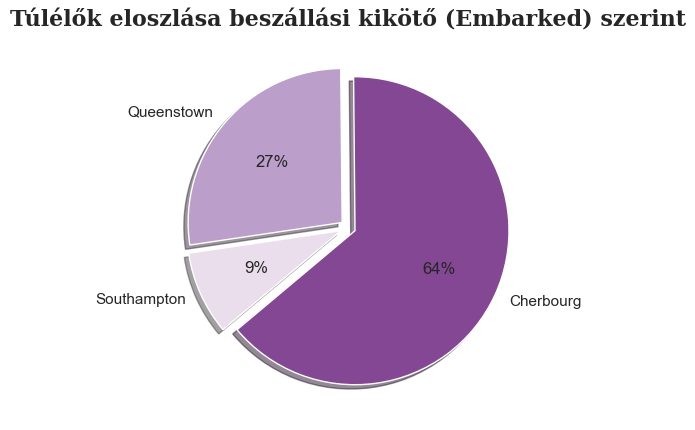

In [32]:
piedata2 = train.groupby('Embarked')[['Survived']].sum()
sns.set (rc = {'figure.figsize':(5, 5)}, palette="PRGn")
plt.title('Túlélők eloszlása beszállási kikötő (Embarked) szerint', fontweight="bold", fontfamily='serif', fontsize=16)
plt.pie(x=piedata2['Survived'], labels=['Cherbourg', 'Queenstown', 'Southampton'], autopct='%1.f%%', explode=(.05,.05,.05), shadow=True, startangle=220)
plt.show()

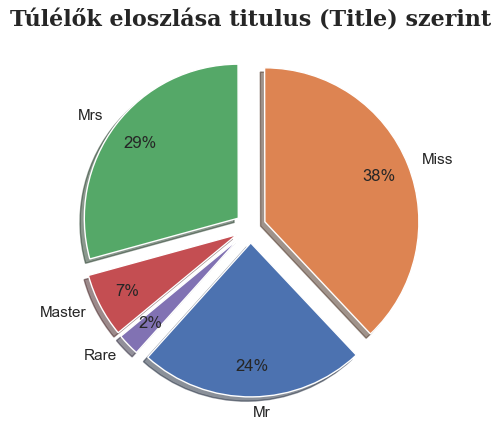

In [33]:
piedata3 = train.groupby('Title')[['Survived']].sum()
sns.set (rc = {'figure.figsize':(5, 5)})
plt.title('Túlélők eloszlása titulus (Title) szerint', fontweight="bold", fontfamily='serif', fontsize=16)
plt.pie(x=piedata3['Survived'], labels=['Mr', 'Miss', 'Mrs', 'Master', 'Rare'], autopct='%1.f%%', explode=(.1,.1,.1,.1,.1), shadow=True, startangle=228, pctdistance=0.8,)
plt.show()

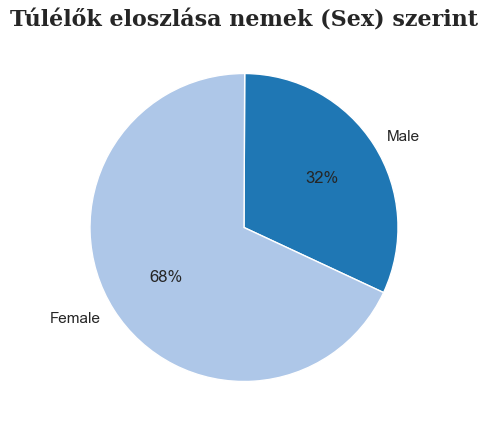

In [34]:
piedata4 = train.groupby('Sex')[['Survived']].sum()
sns.set (rc = {'figure.figsize':(5, 5)}, palette="tab20")
plt.title('Túlélők eloszlása nemek (Sex) szerint', fontweight="bold", fontfamily='serif', fontsize=16)
plt.pie(x=piedata4['Survived'], labels=['Male', 'Female'], autopct='%1.f%%', startangle=335)
plt.show()

A 'Train' adatkészlet:

In [35]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,0,0,1
1,1,1,1,38.0,1,0,3,1,3
2,1,3,1,26.0,0,0,1,0,2
3,1,1,1,35.0,1,0,3,0,3
4,0,3,0,35.0,0,0,1,0,1
5,0,3,0,28.0,0,0,1,2,1
6,0,1,0,54.0,0,0,3,0,1
7,0,3,0,2.0,3,1,2,0,4
8,1,3,1,27.0,0,2,1,0,3
9,1,2,1,14.0,1,0,2,1,3


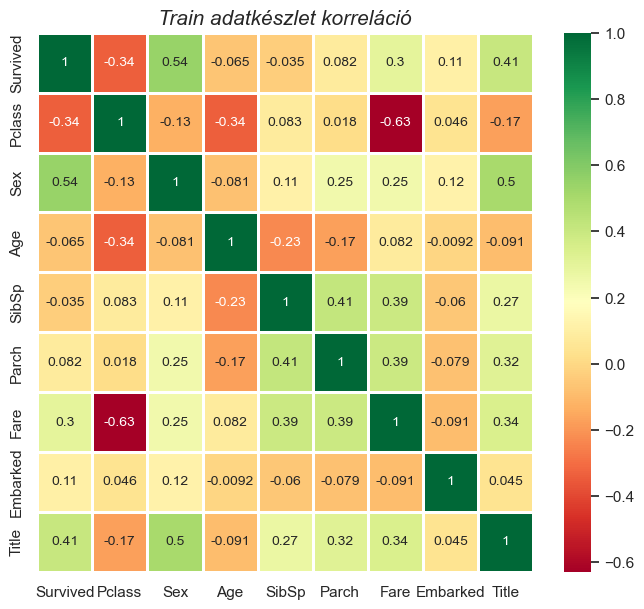

In [36]:
sns.set (rc = {'figure.figsize':(8, 7)})
plt.title('Train adatkészlet korreláció', fontsize = 15, fontstyle = 'italic')
sns.heatmap(data=train.corr(), annot=True, annot_kws={'fontsize':10 }, linewidths=1, cmap="RdYlGn")
plt.show()

A 'Test' adatkészlet:

In [37]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,0,2,1
1,893,3,1,47.0,1,0,0,0,3
2,894,2,0,62.0,0,0,1,2,1
3,895,3,0,27.0,0,0,1,0,1
4,896,3,1,22.0,1,1,1,0,3
5,897,3,0,14.0,0,0,1,0,1
6,898,3,1,30.0,0,0,0,2,2
7,899,2,0,26.0,1,1,2,0,1
8,900,3,1,18.0,0,0,0,1,3
9,901,3,0,21.0,2,0,2,0,1


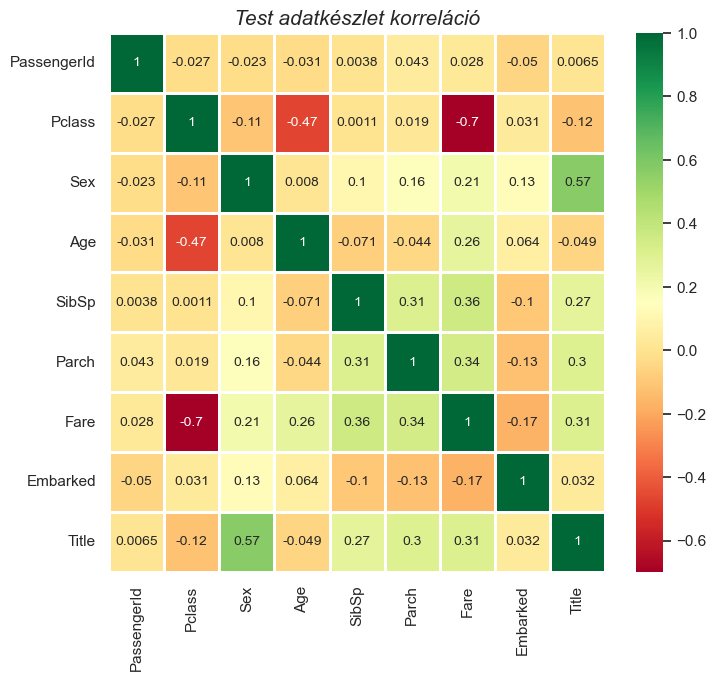

In [38]:
sns.set (rc = {'figure.figsize':(8, 7)})
plt.title('Test adatkészlet korreláció', fontsize = 15, fontstyle = 'italic')
sns.heatmap(data=dataset.corr(), annot=True, annot_kws={'fontsize':10 }, linewidths=1, cmap="RdYlGn")
plt.show()

<br>

## Modell, predikció, megoldás

Most már készen állunk arra, hogy betanítsuk a modellt, és prediktáljuk a megoldást.<br> Ebben a példában úgynevezett felügyelt gépi tanulást végzünk: a modellt egy adott adathalmazzal tanítjuk. (Train adatkészlet)

Ezeket az algoritmusokat fogjuk használni:

Logistic Regression<br>
Support Vector Machines<br>
K-Nearest Neighbors<br>
Gaussian Naive Bayes<br>
Linear SVC<br>
Decision Tree<br>
Random Forrest<br>
Histogram-Based Gradient Boosting<br>
AdaBoost Classifier<br>
MLP Classifier<br>
<br>

Az adatkészletek szétbontása X és Y szekvenciákra.

In [39]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

Algoritmusok

In [40]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machines', SVC()),
    ('K-Nearest Neighbor', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Linear SVC', LinearSVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('HB Gradient Boosting', HistGradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('MLP Classifier', MLPClassifier())
]

results = []
predictions = {}
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

for name, model in models:
    model.fit(X_train, Y_train)
    acc = round(model.score(X_train, Y_train) * 100, 2)
    results.append({'Model': name, 'Score': acc})
    Y_pred = model.predict(X_test)
    predictions[name] = Y_pred

models_df = pd.DataFrame(results)
models_df.sort_values(by='Score', ascending=False, inplace=True)
models_df.style.background_gradient(cmap='RdYlGn')

,Model,Score
5,Decision Tree,95.170000
6,Random Forest,95.170000
7,HB Gradient Boosting,91.130000
2,K-Nearest Neighbor,86.080000
8,AdaBoost,83.160000
9,MLP Classifier,82.380000
4,Linear SVC,81.480000
0,Logistic Regression,80.810000
3,Gaussian Naive Bayes,80.020000
1,Support Vector Machines,75.650000


A legnagyobb pontszámot kapott algoritmus prediktált értékeinek kiválasztása

In [41]:
best_model_name = models_df.iloc[0]['Model']
Y_pred = predictions[best_model_name]

Predikció kiírása a cél fájlba.

In [42]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)